# Statistical Analysis of Blood Pressure of the Population Sample Generated Through NHANES 2015-16

This notebook will be to demonstrate and practice various statistical analysis techniques, specifically focusing on systolic and diastolic blood pressure in the NHANES dataset.

This was completed as part of Coursera's Statistics with Python Course.

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [2]:
da = pd.read_csv("nhanes_2015_2016.csv")

## Univariate analyses of systolic and diastolic BP

#### Summary statistics

In [3]:
#first systolic BP measurement taken
da.BPXSY1.describe()

count    5401.000000
mean      125.084614
std        18.480873
min        82.000000
25%       112.000000
50%       122.000000
75%       134.000000
max       236.000000
Name: BPXSY1, dtype: float64

In [4]:
#second systolic BP measurement taken
da.BPXSY2.describe()

count    5535.000000
mean      124.783017
std        18.527012
min        84.000000
25%       112.000000
50%       122.000000
75%       134.000000
max       238.000000
Name: BPXSY2, dtype: float64

In [5]:
#first diastolic BP measurement taken
da.BPXDI1.describe()

count    5401.000000
mean       69.516386
std        12.881575
min         0.000000
25%        62.000000
50%        70.000000
75%        78.000000
max       120.000000
Name: BPXDI1, dtype: float64

In [6]:
#second diastolic BP measurement taken
da.BPXDI2.describe()

count    5535.000000
mean       69.346703
std        13.022829
min         0.000000
25%        62.000000
50%        70.000000
75%        78.000000
max       144.000000
Name: BPXDI2, dtype: float64

#### Those within a certain range - pre-hypertension

Pre-hypertension generally considered as a systolic blood pressure 120-139, or  diastolic blood pressure 80-89.  

What is the proportion of people that have a systolic BP considered as pre-hypertensive? 

In [7]:
#proportion of entries in da greater than or equal to 120 and less than or equal to 139
np.mean((da.BPXSY1 >= 120) & (da.BPXSY2 <= 139))

0.3741935483870968

Approximately 37.4% of people in the NHANES sample are pre-hypertensive based on systolic BP.

What propotion are pre-hypertensive based on diastolic blood pressure?

In [8]:
np.mean((da.BPXDI1 >= 80) & (da.BPXDI2 <= 89))

0.14803836094158676

Approximately 14.8% are pre-hypertensive based on duastolic BP

What proportion are pre-hypertensive based on either systolic or diastolic blood pressure?  

Since some people are pre-hypertensive under both, it is likely that the overall proportion will be less than the sum.

In [9]:
a = (da.BPXSY1 >= 120) & (da.BPXSY2 <= 139)
b = (da.BPXDI1 >= 80) & (da.BPXDI2 <= 89)

#use | for or
print(np.mean(a | b)) 

0.43975588491717527


Approximately 44% of people in the NHANES sample a pre-hypertensive

Repeated BP measures are taken (3 times for both systolic and diastolic) in the NHANES study to avoid 'white coat anxiety'.

To what extent is white coat anxiety present in the NHANES data (i.e. what is the mean difference between the first and second systolic or diastolic BP measurements)?

In [10]:
print(np.mean(da.BPXSY1 - da.BPXSY2))
print(np.mean(da.BPXDI1 - da.BPXDI2))

0.6749860309182343
0.3490407897187558


There is an approximate difference between systolic blood pressure mean of 0.68mmHg, and between diastolic blood pressure mean of 0.35mmHg. The positive values of the second measure subtracted from the first indicates a drop from the first measurement to the second, but the amount indicates a very marginal drop (for both, less than 1mmHg)

#### Visualisation of the distribution of BP

Below is the histogram of systolic blood pressure measurements.

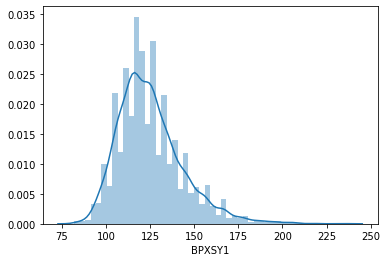

In [11]:
sns.distplot(da.BPXSY1.dropna())

There is clearly a tendency for the measurements to be rounded to the nearest 5 or 10 units, as indicated by the blocky appearance. As with body weight, there is a right skew indicating much fewer at the higher measures

Side-by-side boxplots to compare the distributions of the first and second systolic blood pressure measurements (BPXSY1, BPXSY2), and the first and second diastolic blood pressure measurements (BPXDI1, BPXDI2). 

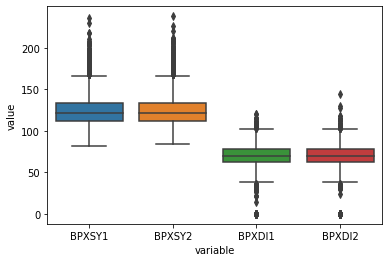

In [12]:
bp = da[["BPXSY1","BPXSY2","BPXDI1","BPXDI2"]]
sns.boxplot(x="variable", y="value", data=pd.melt(bp))

plt.show()

As expected, diastolic measurements are substantially lower than systolic measurements.  From the above calculation, the second blood pressure reading tended on average to be slightly lower than the first, but by less than 1 mm/Hg, so is not really visible in the boxplot comparison.

A boxplot will be used to view the distribution of within-subject differences between the first and second systolic blood pressure measurents (BPXSY1 and BPXSY2).

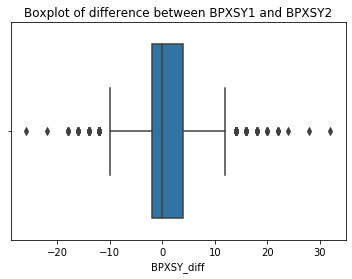

In [13]:
# insert your code here
da['BPXSY_diff'] = (da.BPXSY1 - da.BPXSY2)
sns.boxplot(da['BPXSY_diff']).set_title("Boxplot of difference between BPXSY1 and BPXSY2")
plt.show()

What proportion of the subjects have a lower SBP on the second reading compared to the first?

In [14]:
(da.BPXSY_diff < 0).sum()/da.BPXSY_diff.sum()

0.5400110375275938

### Stratification 

#### Systolic BP and age group 

Health variables, such as blodd pressure, are expected to increase with age. It will be easier to see if this expected relationship exists when grouping the sample into age categories/groups.

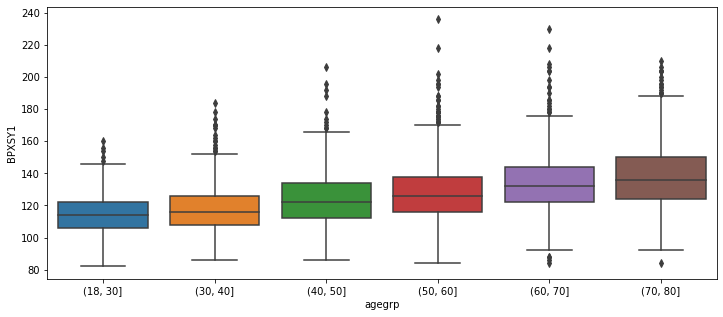

In [15]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80]) # Create age strata based on these cut points
plt.figure(figsize=(12, 5))  # Make the figure wider than default (12cm wide by 5cm tall)
sns.boxplot(x="agegrp", y="BPXSY1", data=da)  # Make boxplot of BPXSY1 stratified by age group

These side-by-side boxplots show that systolic BP appears to increase with age.

#### Systolic BP, gender and age group

It is also anticipated that blood pressure tends to differ between women and men. To visualise the relationship betwene both age and gender below is a double stratification of the data by gender and age.

In [16]:
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

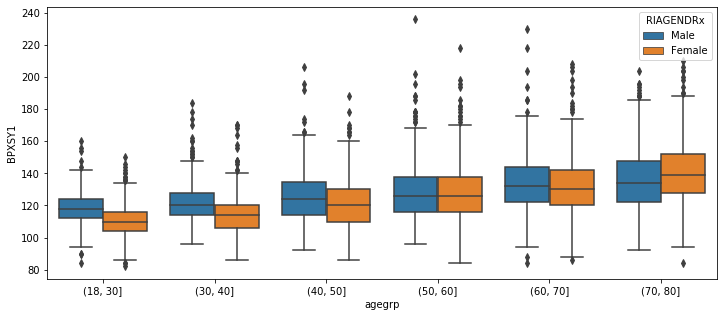

In [17]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(12, 5))
sns.boxplot(x="agegrp", y="BPXSY1", hue="RIAGENDRx", data=da)

The boxplot figure above shows that within each gender, older people tend to have higher blood pressure than younger people.  However within an age band, the relationship between gender and systolic blood pressure is much more complex -- in younger people, men have substantially higher BPs than women of the same age.  However for people older than 50, this relationship becomes much weaker, and among people older than 70 it appears to reverse. Also, the variation of these distributions, reflected in the height of each box in the boxplot, increases with age.

The age trend within gender groups can be visualised by rearranging the boxplots

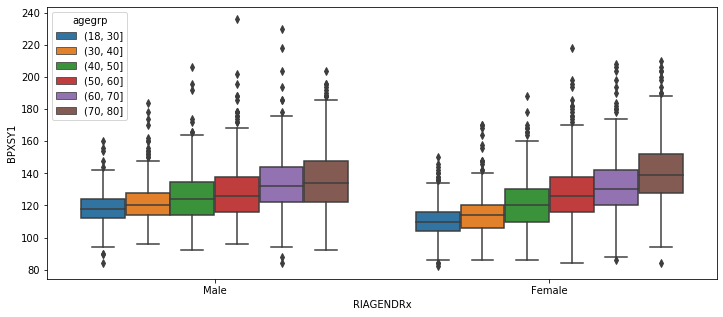

In [18]:
da["agegrp"] = pd.cut(da.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
plt.figure(figsize=(12, 5))
sns.boxplot(x="RIAGENDRx", y="BPXSY1", hue="agegrp", data=da)

## Mulitvariate analysis of BP

Here, BP will be assessed with respect to other traits.  

Firstly, the correlation between systolic and diastolic blood pressure will be considered.

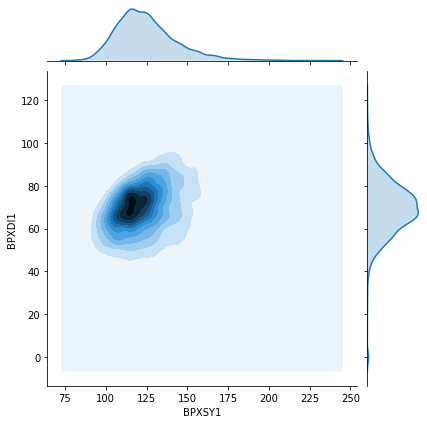

In [19]:
sns.jointplot(x="BPXSY1", y="BPXDI1", kind='kde', data=da)

The first systolic and diastolic BP measurements taken have a weak positive correlation, with a correlation coefficient of 0.32.  This correlation indicates that some people have unusually high systolic blood pressure but have average diastolic blood pressure, and vice versa.

Next we look at two repeated measures of systolic blood pressure, taken a few minutes apart on the same person. 

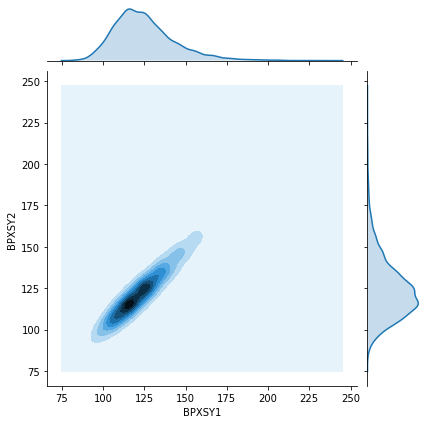

In [20]:
jp = sns.jointplot(x="BPXSY1", y="BPXSY2", kind='kde', data=da)

These values are very highly correlated - as expected as they are essentially measuring the same thing - with a correlation coefficient of around 0.96.

A scatterplot will be used now to view the relationship between the first and second measurements of diastolic blood pressure.  A 4x4 matrix of correlation coefficients among the first two systolic and the first two diastolic blood pressure measures will then follow.

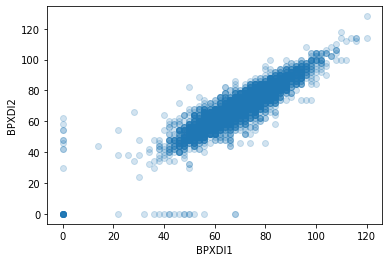

In [21]:
# enter your code here
#scatterplot between first and second measurements
sns.regplot(x="BPXDI1", y="BPXDI2", data=da, fit_reg=False, scatter_kws={"alpha": 0.2})

In [22]:
da[['BPXSY2','BPXDI2','BPXSY1','BPXDI1']].corr()

,BPXSY2,BPXDI2,BPXSY1,BPXDI1
BPXSY2,1.000000,0.303847,0.962287,0.329843
BPXDI2,0.303847,1.000000,0.277681,0.884722
BPXSY1,0.962287,0.277681,1.000000,0.316531
BPXDI1,0.329843,0.884722,0.316531,1.000000


The correlation between repeated measurements of diastolic blood pressure is 0.88. The correlation between repeated measurements of systolic blood pressure is 0.96. Both show a strong positive correlation. However, the correlation is stronger between repeated measures of systolic blood pressure.

The second systolic and second diastolic blood pressure measures are marginally less correlated than the first systolic and first diastolic blood pressure measures (0.30 and 0.32 respectively).

Correlation coefficients of log transformed blood pressure variables will now be considered.

In [23]:
# log transform
da_bp = da.loc[:, ['BPXSY1','BPXDI1','BPXSY2','BPXDI2']]
da_bp_log = np.log(da_bp)

/Users/charlottefettes/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


In [24]:
da_bp_log[['BPXSY2','BPXDI2','BPXSY1','BPXDI1']].corr()

,BPXSY2,BPXDI2,BPXSY1,BPXDI1
BPXSY2,1.000000,0.329064,0.958549,0.339144
BPXDI2,0.329064,1.000000,0.304323,0.888256
BPXSY1,0.958549,0.304323,1.000000,0.330588
BPXDI1,0.339144,0.888256,0.330588,1.000000


The correlation between log transformed repeated measurements of diastolic blood pressure is 0.89. The correlation between repeated measurements of systolic blood pressure is 0.96. The log transformed data has not changed within measure correlation.

The log transformed second systolic and second diastolic blood pressure measures now have the same correlation coefficient as the log transformed first systolic and first diastolic blood pressure measures (0.33). This suggests the second measurements have a more skewed distribution than the first. But the change is very small.

A grid of scatterplots between the first systolic and the first diastolic blood pressure measurement will be created now, with stratification by gender and ethnicity to view if these variables have different correlations between systolic and diastolic BP.

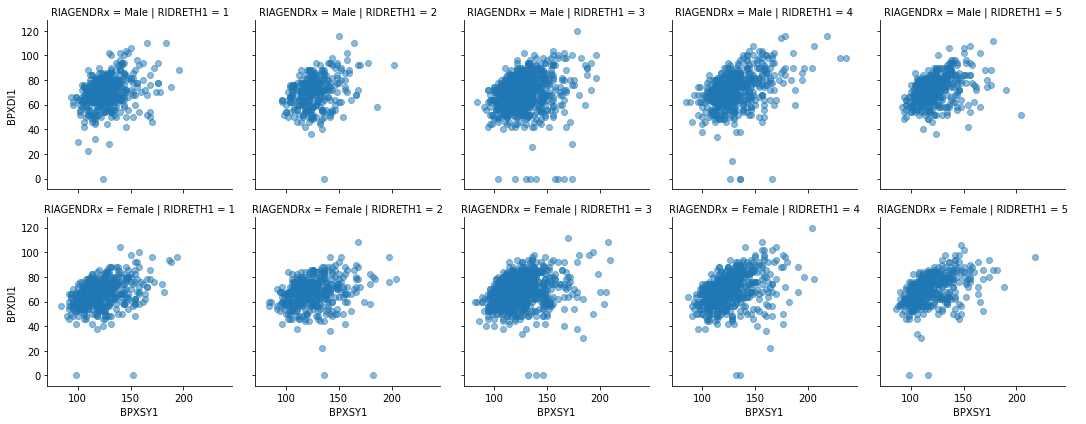

In [25]:
# insert your code here
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"}) 
_ = sns.FacetGrid(da, col="RIDRETH1",  row="RIAGENDRx").map(plt.scatter, "BPXSY1", "BPXDI1", alpha=0.5).add_legend()

From this grid of scatterplots, all demographic subgroups display a positive correlation between diastolic and systolic BP. From sight alone, it appears that females tend to have a flatter correlation (for a unit rise in systolic BP, diastolic increases less than compared to males). But on the whole, male and female correlations within ethnic groups are quite similar. 

Inter-ethnic correlations appear to differ slightly, with groups 3 and 4 having a broader range, but this may be at least partly due to their appearing to be a larger number of observations within this group.



## Sampling distributions

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

In [27]:
da = pd.read_csv("nhanes_2015_2016.csv")

### Sampling distribution of the mean

Here, repeated measures will be mimicked through the use of subsamples randomly selected (rather than obtaining independent copies) in order to see what would happen if the data were sampled repeatedly from the population that produced.

Here, two disjoint subsets of size 100 will be subsampled to calculate the mean systolic blood pressure within each of these two subsets, then the difference between these two means calculated, in order to reflect the chance variation likely observed if NHANES had only sampled 100 participants. By sampling two subsets of size 100 and comparing the resulting calculated means, we can see how the findings of two researchers independently studying the same population might differ from each other by chance.  

The subsampling process is then repeated 1000 times to see how two samples of size 100 from the NHANES population tend to differ in terms of their mean systolic blood pressure.

In [28]:
m = 100 # Subsample size
sbp_diff = [] # Storage for subsample mean differences

#range 1000 so loop repeats the sampling of two 100-observation subsamples 1000 times
for i in range(1000):
    dx = da.sample(2*m)  # two subsamples of size m
    dx1 = dx.iloc[0:m, :]  # First subsample
    dx2 = dx.iloc[m:, :]  # Second subsample
    sbp_diff.append(dx1.BPXSY1.mean() - dx2.BPXSY1.mean())  # difference of mean BPXSY1 values

The histogram below shows the 1000 mean differences generated by the loop.

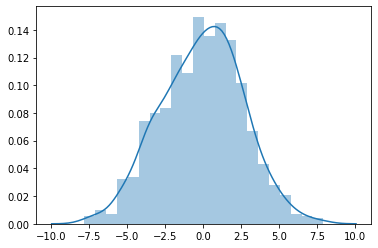

In [29]:
sns.distplot(sbp_diff)

The histogram shows that sample mean systolic BP typically falls between -5 and +5.  Thus, two independent BP studies in the same population may by chance obtain results that are up to around 5 units different, but are quite unlikely to obtain results that are by chance more than 10 units different.

Numerical statistics of the histogram above are as follows.

In [30]:
pd.Series(sbp_diff).describe()

count    1000.000000
mean       -0.077927
std         2.702078
min        -7.815310
25%        -1.943226
50%         0.025467
75%         1.748560
max         7.936842
dtype: float64

Results above indicate that mean systolic BPs calculated for two samples each with 100 people will typically differ by around 2.8 mm/Hg (standard deviation), and will rarely differ by >5 mm/Hg.

A larger sample size - below, 400 - is likely to alter the chance fluctuations, reducing the spread of the means (i.e. standard deviations), and concetrating the data more around the unknown population mean.

count    1000.000000
mean       -0.020478
std         1.341772
min        -4.226358
25%        -0.953099
50%         0.035087
75%         0.881063
max         4.146797
dtype: float64

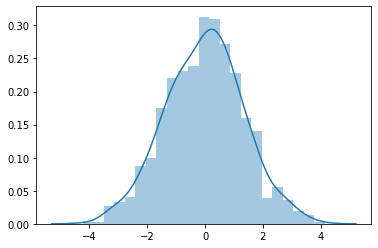

In [31]:
m = 400  # Change the sample size, everything else below is unchanged from the cells above
sbp_diff = []

for i in range(1000):
    dx = da.sample(2*m)
    dx1 = dx.iloc[0:m, :]
    dx2 = dx.iloc[m:, :]
    sbp_diff.append(dx1.BPXSY1.mean() - dx2.BPXSY1.mean())
    
sns.distplot(sbp_diff)
pd.Series(sbp_diff).describe()

Samples of size 400 reduces the standard deviation from 2.8 (sample size 100) to around 1.38 - approximately half of what it was when we used samples of size 100.  The smaller standard deviation indicates chance flucatations in mean systolic BP are smaller when we have a larger sample size.  Thus, with a larger sample size, we are able to estimate the population mean systolic BP with more precision.

### Sampling distribution of the correlation coefficient

Utilising the sampling method above, the Pearson correlation coefficient between systolic and diastolic BP will be considered.

In [32]:
for m in 100, 400:  # m is the subsample size
    sbp_diff = [] # calculate correlation coefficients from independent samples of size m
    for i in range(1000):
        dx = da.sample(2*m)
        dx1 = dx.iloc[0:m, :]
        dx2 = dx.iloc[m:, :]
        r1 = np.corrcoef(dx1.loc[:, ["BPXSY1", "BPXDI1"]].dropna().T)
        r2 = np.corrcoef(dx2.loc[:, ["BPXSY1", "BPXDI1"]].dropna().T)
        sbp_diff.append(r1 - r2)
    print("m=%d" % m, np.std(sbp_diff), np.sqrt(2 / m))   

m=100 0.12397242334867768 0.1414213562373095
m=400 0.06573419864872608 0.07071067811865475


The above shows that when the subsample size increases from 100 to 400 (a factor of 4), standard deviation of the difference between two correlation coefficients decreases by roughly a factor of 2. The mathematical expression sqrt(2 / m) is an approximation to this standard deviation that can be computed without access to any data. 

### The shape of sampling distributions

Focusing on the shape of the distribution of statistics calculated on subsamples, the central limit theorem is anticipated to generate an approxaimtely normal sampling distribution, even if the underlying data is not normally distributed - the distribution of the means from the samples is likely to be normally distributed.

Shown below is a histogram of the distribution of the individual systolic BP values - it is right-skewed. Then, using a for loop, 1000 sample means from 1000 subsampls will be used to generate a histogram of the sample means - this is much more normally distributed.

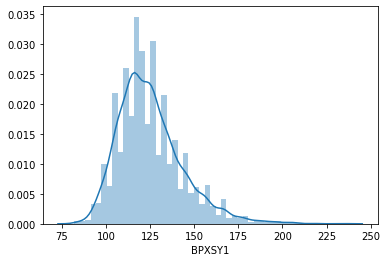

In [33]:
sns.distplot(da.BPXSY1.dropna())

Following is generation of 1000 sample means from 1000 subsamples of size 100 and a histogram to visualise their distribution.

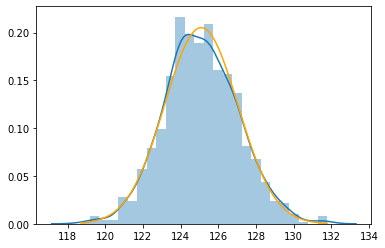

In [34]:
m = 100
sbp_mean = []
for i in range(1000):
    dx = da.sample(m)
    sbp_mean.append(dx.BPXSY1.dropna().mean())
sns.distplot(sbp_mean)

# The lines below plot the density of a normal approximation to the data generated above
x = np.linspace(np.min(sbp_mean), np.max(sbp_mean), 100)
from scipy.stats.distributions import norm
v = dx.BPXSY1.dropna()
y = norm.pdf(x, np.mean(sbp_mean), np.std(sbp_mean))
plt.plot(x, y, color='orange')

The plots above show that while the distribution of individual systolic blood pressure measures is somewhat skewed to the right, the distribution of means of size 100 is approximately symmetric.  The distribution of means is also approximately normal, as shown by the orange curve, which is the best-fitting normal approximation to the data.

## Confidence intervals

In [35]:
da = pd.read_csv("nhanes_2015_2016.csv")

In [36]:
#95% CI for mean first systolic BP
tstar = 1.96
mean = da.BPXSY1.mean()
sd = da.BPXSY1.std()
n = len(da)

se = sd/np.sqrt(n)

lcb = mean - tstar*se
ucb = mean + tstar*se

(lcb, ucb)

(124.60630134587866, 125.56292657487676)

With 95%, the population mean first measure systolic BP lies in the interval 124.61 and 125.56

In [37]:
#95% CI for mean second systolic BP
tstar = 1.96
mean = da.BPXSY2.mean()
sd = da.BPXSY2.std()
n = len(da)

se = sd/np.sqrt(n)

lcb = mean - tstar*se
ucb = mean + tstar*se

(lcb, ucb)

(124.30351040092819, 125.26252392608174)

With 95%, the population mean first measure systolic BP lies in the interval 124.30 and 125.26

In [38]:
#difference between first and second systolic BP
da['sys_diff'] = da.BPXSY1 - da.BPXSY2

In [39]:
#95% CI for mean difference in systolic BP
tstar = 1.96
mean = da.sys_diff.mean()
sd = da.sys_diff.std()
n = len(da)

se = sd/np.sqrt(n)

lcb = mean - tstar*se
ucb = mean + tstar*se

(lcb, ucb)

(0.5443759623573572, 0.8055960994791114)

With 95% confidence the mean difference between first and second systolic BP measures lies in the interval 0.54 and 0.81

Based on these confidence intervals, a difference of zero between the population mean values of the first and second systolic blood pressure measures is not consistent with the data. As the interval does not include zero (lcb and UCB both >0), the difference between population mean values is not zero.

The confidence intervals for the within-subject difference is approximately the same for both first and second measures (0.95 and 0.96 mmHg respectively). The width of the confidence intervals for the difference between first and second measures is much smaller (0.27).

# Hypothesis Testing

Although the NHANES data are a "complex survey" - not an independent and representative sample from the target population - proper analysis should make use of information about how the data were collected. This aspect of the data will be ignored here, and the data will be analysed as if it were an independent and identically distributed sample from a population.

In [40]:
import pandas as pd
import numpy as np
import matplotlib
matplotlib.use('Agg')
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy.stats.distributions as dist

In [41]:
url = "nhanes_2015_2016.csv"
da = pd.read_csv(url)

### Hypothesis Tests Comparing Means

Null hypothesis: the mean blood pressure for women between the ages of 50 and 60 is equal to the mean blood pressure of men between the ages of 50 and 60.

Alternative hypothesis: the mean blood pressure for women between the ages of 50 and 60 is not equal to the mean blood pressure of men between the ages of 50 and 60.

The hypothesis will be tested at tge 1% significance level.

In [42]:
#converting code to text for gender
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

In [43]:
dx = da[["BPXSY1", "RIDAGEYR", "RIAGENDRx"]].dropna()

#filter by age
dx = dx.loc[(dx.RIDAGEYR >= 50) & (dx.RIDAGEYR <= 60), :]
dx.head()

,BPXSY1,RIDAGEYR,RIAGENDRx
1,146.0,53,Male
3,132.0,56,Female
9,178.0,56,Male
15,134.0,57,Female
19,136.0,54,Female


In [44]:
#find means of systolic BP for males and for females separately
bpx_female = dx.loc[dx.RIAGENDRx=="Female", "BPXSY1"]
bpx_male = dx.loc[dx.RIAGENDRx=="Male", "BPXSY1"]
print('Female mean systolic BP: ', bpx_female.mean(), '\nMale mean systolic BP: ', bpx_male.mean())

Female mean systolic BP:  127.92561983471074 
Male mean systolic BP:  129.23829787234044


Two variants on the two-sample t-test will be executed below. First, the t-test carried out using the t-distribution, and second the t-test carried out using the normal approximation to the reference distribution of the test statistic, the z-test. As the sample size is large, the difference between the t-test and z-test will be very small. 

In [45]:
#t-test
print(sm.stats.ttest_ind(bpx_female, bpx_male))

(-1.105435895556249, 0.26925004137768577, 952.0)


In [46]:
#z-test
print(sm.stats.ztest(bpx_female, bpx_male))

(-1.105435895556249, 0.2689707570859362)


Both results indicate that while the mean systolic blood pressure for men is slightly greater than that for women (129 mm/Hg versus 128 mm/Hg), this difference is not statistically significant. 

The first value is the calculated statistic, the second is the two-tailed p-value. The p-value for both is 0.27; this value is larger than 0.1, therefore we fail to reject the null hypothesis.

### Paired tests

In NHANES, systolic BP is measured at least two times (sometimes more) on each subject.  Although measurements are repeated, there is no guarantee that the mean is the same each time, i.e. mean BP may be slightly lower on the second measurement compared to the first, since people are more nervous the first time. A paired t-test can be used to compare two repeated measurements on the same unit.

In [47]:
dx = da[["BPXSY1", "BPXSY2"]].dropna()
db = dx.BPXSY1 - dx.BPXSY2
print(db.mean())
sm.stats.ztest(db)

0.6749860309182343


(9.800634425497911, 1.1188070930963587e-22)

The paired t-test for means is equivalent to taking the difference between the first and second measurement, and using a one-sample test to compare the mean of these differences to zero. 

The paired t-test above shows that in the entire NHANES sample, the first measurement of systolic BP is on average 0.67 mm/Hg greater than the second.  While this difference is not large, it is strongly statistically significant (much smaller than 0.05).  Thus, there is strong evidence that the mean values for the first and second BP measurement differ.

To look into this effect further, the population will now be divided into 10 year-wide age bands and stratified by gender. Then the paired t-test will be carried out within each of the resulting 12 strata.

In [48]:
dx = da[["RIAGENDRx", "BPXSY1", "BPXSY2", "RIDAGEYR"]].dropna()
dx["agegrp"] = pd.cut(dx.RIDAGEYR, [18, 30, 40, 50, 60, 70, 80])
for k, g in dx.groupby(["RIAGENDRx", "agegrp"]):
    db = g.BPXSY1 - g.BPXSY2
    # print stratum definition, mean difference, sample size, test statistic, p-value
    print(k, db.mean(), db.size, sm.stats.ztest(db.values, value=0))

('Female', Interval(18, 30, closed='right')) 0.13708260105448156 569 (0.7612107360791227, 0.4465312067051751)
('Female', Interval(30, 40, closed='right')) 0.6713615023474179 426 (3.307398751951031, 0.0009416674523368051)
('Female', Interval(40, 50, closed='right')) 0.5970149253731343 469 (2.6040611621024654, 0.009212631487347644)
('Female', Interval(50, 60, closed='right')) 0.7685393258426966 445 (3.1023718750881724, 0.001919766301204196)
('Female', Interval(60, 70, closed='right')) 0.8787878787878788 396 (3.1024528501809625, 0.0019192411825181255)
('Female', Interval(70, 80, closed='right')) 1.4512820512820512 390 (5.141706875154317, 2.722536503552981e-07)
('Male', Interval(18, 30, closed='right')) 0.00390625 512 (0.01959622841647691, 0.9843654725443948)
('Male', Interval(30, 40, closed='right')) 0.46296296296296297 432 (1.9451535788714596, 0.05175649697939119)
('Male', Interval(40, 50, closed='right')) 0.17894736842105263 380 (0.7201800810138878, 0.47141412641258706)
('Male', Interva

The above shows that the second systolic BP measurement is always lower on average than the first. The difference is larger for older people and for males. The difference is statistically significant for females over 30 years, and for males over 60 years.   

However, although this multiple testing is being done predomoinantly to practice hypothesis testing, it is bad practice, and the strongest differences seen may be overstated.

Despite this, there is a clear and consistent trend with age -- older people tend to have greater differences between their first and second BP measurements than younger people. Furthermore, there is a difference between the genders, with older men having a stronger difference between the first and second BP measurements than older women. Gender difference for younger peple is less clear.

## Power and sample size for hypothesis tests 

Below, the paired t-test will be used for assessing whether the first and second systolic BP measurement have different means, restricting to people between 50 and 60 years of age. 

To analyse the effect of sample size on the behaviour of a hypothesis test, the simulation below will randomly subsample sets of 100, 200, 400, and 800 people from the 50-60 year old subset of NHANES, and conduct a paired z-test on each subsample. This will be repeated 500 times for each sample size. 

The fraction of the 500 trials where the p-value is smaller than 0.05 will be reported, with a higher fraction of trials where p<0.05 implying that it is easier to detect a difference between the first and second BP measurements. 

In [49]:
all_p = []
dy = dx.loc[(dx.RIDAGEYR >= 50) & (dx.RIDAGEYR <= 60), :]
for n in 100, 200, 400, 800:
    pv = []
    for i in range(500):
        dz = dy.sample(n)
        db = dz.BPXSY1 - dz.BPXSY2
        _, p = sm.stats.ztest(db.values, value=0)
        pv.append(p)
    pv = np.asarray(pv)
    all_p.append(pv)
    print((pv <= 0.05).mean())

0.24
0.388
0.686
1.0


The above shows that the proportion of trials with a p-value<0.05 is only around 0.2 when the sample size is 100, and grows to 100% when the sample size is 800. 

As all subsamples are drawn from the same parent population, there is no change from subsample to subsample in terms of whether the means are truly different. The only thing that changes is the evidence that the difference is real - the smaller the sample size, the less evidence amassed.

Using a histogram, the distribution of p-values for 500 subsamples of data of size 100 can be visualised.

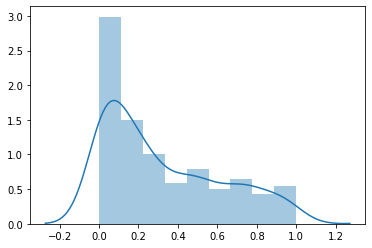

In [50]:
sns.distplot(all_p[0])

The above histogram shows that there are more smaller p-values than larger ones for subsamples fo size 100, but not to a dramatic degree. Some of the p-values are almost 1, indicating that the subsample mean differences were almost 0 in those cases.

Next is the p-value distribution for the subsamples of size 200.

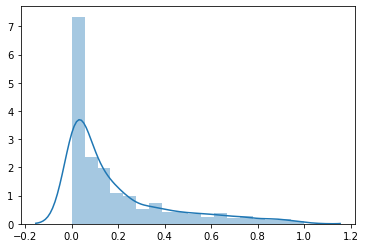

In [51]:
sns.distplot(all_p[1])

Next is the distribution of p-values for subsamples of size 400.

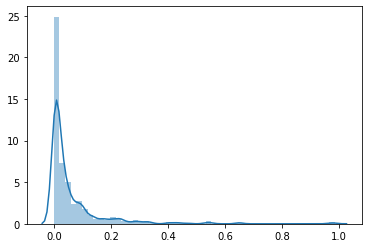

In [52]:
sns.distplot(all_p[2])

It shows that the p-values are much more concentrated close to zero compared to subsamples with only 100 data points. Thus a sample of size 400 from this population would be expected to have around a 70% chance of obtaining a p-value smaller than 0.05, and are very unlikely to obtain a p-value greater than 0.4.

Below is the distribution of p-values for subsamples of size 400.

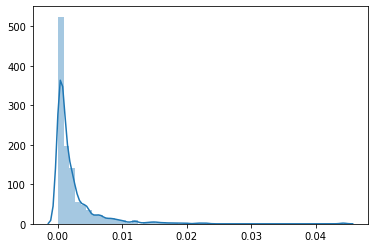

In [53]:
sns.distplot(all_p[3])

Due to the high concentration of p-values at the smaller numbers, the x-axis scale is zoomed in, indicating an above 90% chance of obtaining a p-value smaller than 0.05, and very unlikely to obtain a p-value greater than 0.01.

# Linear regression modeling

The focus here will be on fitting linear regression model to data, using Python statistical modelling libraries. The NHANES data were collected as a designed survey, so should be analysed as such, thus survey design information such as weights, strata, and clusters should be accounted for. But for now, it will be considered as independent data samples, or with convenience samples, without incorporating the survey structure of the NHANES sample into the analyses conducted here.

In [54]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

In [55]:
# Read the 2015-2016 wave of NHANES data
da = pd.read_csv("nhanes_2015_2016.csv")

# Drop unused columns, and drop rows with any missing values.
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI", "SMQ020"]
da = da[vars].dropna()

The focus here will be on developing a linear regression model (as BP is quantitative) in which systolic BP(SBP) is the outcome (dependent) variable. The model will intend to predict SBP from other variables.  SBP is an important indicator of cardiovascular health. It tends to increase with age, is greater for overweight people (i.e. people with greater body mass index or BMI), and also differs among demographic groups, for example among gender and ethnic groups.

### Interpreting regression parameters in a basic model

The start point will be a simple linear regression model with only one covariate, age, predicting SBP. 

In [56]:
model = sm.OLS.from_formula("BPXSY1 ~ RIDAGEYR", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.207
Method:                 Least Squares   F-statistic:                     1333.
Date:                Tue, 15 Oct 2019   Prob (F-statistic):          2.09e-259
Time:                        15:21:14   Log-Likelihood:                -21530.
No. Observations:                5102   AIC:                         4.306e+04
Df Residuals:                    5100   BIC:                         4.308e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    102.0935      0.685    149.120      0.000     100.751     103.436
RIDAGEYR       0.4759      0.013     36.504      0.000       0.450       0.501
==============================================================================
Omnibus:                      690.261   Durbin-Watson:                   2.039
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1505.999
Skew:                           0.810   Prob(JB):                         0.00
Kurtosis:                       5.112   Cond. No.                         156.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The output where the header begins with __coef__ contains estimated values of the parameters of the regression model, their standard errors, and other values that are used to quantify the uncertainty in the regression parameter estimates. 

This model implies when comparing two people whose ages differ by one year, the older person
will on average have 0.48 units higher SBP than the younger person. This difference is statistically significant, based on the p-value shown under the column labeled __`P>|t|`__.  So there is strong evidence that there is a real association between between systolic BP and age in this population.

To better understand the meaning of the estimated regression parameter 0.48, look at the standard deviation of SBP:

In [57]:
da.BPXSY1.std()

18.486559500781865

The standard deviation of around 18.5 is large compared to the regression slope of 0.48.  However the regression slope corresponds to the average change in SBP for a single year of age, and this effect accumulates with age. Comparing a 40 year-old person to a 60 year-old
person, there is a 20 year difference in age, which translates into a `20 * 0.48 = 9.6` unit difference in average SBP between these two people. This difference is around half of one standard deviation, and can be considered an important and meaningful shift.

### R-squared and correlation

In this case of regression with a single independent variable, there is a very close
correspondence between the regression analysis and a Pearson correlation analysis. The primary summary statistic for assessing the strength of a predictive relationship in a regression model is the *R-squared*, which is shown to be 0.207 in the regression output above.  This means 21% of the variation in SBP is explained by age, which is the same as the correlation coefficient. 

In [58]:
cc = da[["BPXSY1", "RIDAGEYR"]].corr()
print(cc.BPXSY1.RIDAGEYR**2)

0.20715459625188243


Another interpretation of the R-squared: the fitted values are predictions of the BP for each person in the data set, based on their covariate values. Here, the only covariate is age, so each NHANES subject's BP is being predicted as a function of their age. If the Pearson correlation coefficient is calculated between the fitted values from the regression, and actual SBP values, and then square this correlation coefficient, it provides the R-squared from the regression:

In [59]:
cc = np.corrcoef(da.BPXSY1, result.fittedvalues)
print(cc[0, 1]**2)

0.20715459625186952


Thus, in a linear model fit with only one covariate, the regression R-squared is equal to the squared Pearson correlation between the covariate and the outcome, and is also equal to the squared Pearson correlation between the fitted values and the outcome.

### Adding a second variable

As SBP is expected to be related to gender as well as to age, gender will now be added to the
model. 

In [60]:
# Create a labeled version of the gender variable
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

In [61]:
#fit the model
model = sm.OLS.from_formula("BPXSY1 ~ RIDAGEYR + RIAGENDRx", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.215
Model:                            OLS   Adj. R-squared:                  0.214
Method:                 Least Squares   F-statistic:                     697.4
Date:                Tue, 15 Oct 2019   Prob (F-statistic):          1.87e-268
Time:                        15:21:14   Log-Likelihood:                -21505.
No. Observations:                5102   AIC:                         4.302e+04
Df Residuals:                    5099   BIC:                         4.304e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           100.6305      0.712    141.257      0.000      99.234     102.027
RIAGENDRx[T.Male]     3.2322      0.459      7.040      0.000       2.332       4.132
RIDAGEYR              0.4739      0.013     36.518      0.000       0.448       0.499
==============================================================================
Omnibus:                      706.732   Durbin-Watson:                   2.036
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1582.730
Skew:                           0.818   Prob(JB):                         0.00
Kurtosis:                       5.184   Cond. No.                         168.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The model finds that two people with the same gender whose ages differ by one year tend to have BP values differing by 0.47 units, which is essentially the same age parameter found above in the model based on age alone. This model also shows that comparing a man and a woman of the same age, the man will on average have 3.23 units greater SBP.

The age coefficient of 0.47 is only meaningful when comparing two people of the same gender, and the gender coefficient of 3.23 is only meaningful when comparing two people of the same age. These effects are additive, e.g. comparing a 50 year old man to a 40 year old woman, the man's BP will on average be around 3.23 + 10 * 0.47 = 7.93 units higher, with the first
term in this sum being attributable to gender, and the second term being attributable to age.

The regression coefficient for age did not change by much when gender was added to the model.  However, in general, the estimated coefficient of a variable in a regression model will change when other variables are added or removed. The only circumstance in which a regresion parameters is unchanged when other variables are added or removed from the model is when those
variables are uncorrelated with the variables that remain in the model.

Lets see how gender and age correlate in this data set.

In [62]:
# We need to use the original, numerical version of the gender
# variable to calculate the correlation coefficient.
da[["RIDAGEYR", "RIAGENDR"]].corr()

,RIDAGEYR,RIAGENDR
RIDAGEYR,1.000000,-0.021398
RIAGENDR,-0.021398,1.000000


The above shows a very low correlation between gender and age - the correlation of around -0.02 is negligible.  Thus, it is expected that when gender is added to the model, the age coefficient is unaffected.

In the regression output above, an R-squared value of 0.215 is listed. Now that there are two covariates, this R-squared value can be defined as the squared correlation coefficient between the fitted values and the outcome.

In [63]:
cc = np.corrcoef(da.BPXSY1, result.fittedvalues)
print(cc[0, 1]**2)

0.21478581086243798


### A model with three variables

Next a third variable will be added, namely body mass index (BMI), to the model predicting SBP.

In [64]:
model = sm.OLS.from_formula("BPXSY1 ~ RIDAGEYR + BMXBMI + RIAGENDRx", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 BPXSY1   R-squared:                       0.228
Model:                            OLS   Adj. R-squared:                  0.228
Method:                 Least Squares   F-statistic:                     502.0
Date:                Tue, 15 Oct 2019   Prob (F-statistic):          8.54e-286
Time:                        15:21:15   Log-Likelihood:                -21461.
No. Observations:                5102   AIC:                         4.293e+04
Df Residuals:                    5098   BIC:                         4.296e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            91.5840      1.198     76.456      0.000      89.236      93.932
RIAGENDRx[T.Male]     3.5783      0.457      7.833      0.000       2.683       4.474
RIDAGEYR              0.4709      0.013     36.582      0.000       0.446       0.496
BMXBMI                0.3060      0.033      9.351      0.000       0.242       0.370
==============================================================================
Omnibus:                      752.325   Durbin-Watson:                   2.040
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1776.087
Skew:                           0.847   Prob(JB):                         0.00
Kurtosis:                       5.343   Cond. No.                         316.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

BMI is positively associated with SBP. Given two subjects with the same gender and age, and whose BMI differs by 1 unit, the person with greater BMI will have, on average, 0.31 units greater SBP. After adding BMI to the model, the coefficient for gender became greater. This is due to the fact that the three covariates in the model, age, gender, and BMI, are mutually correlated:

In [65]:
da[["RIDAGEYR", "RIAGENDR", "BMXBMI"]].corr()

,RIDAGEYR,RIAGENDR,BMXBMI
RIDAGEYR,1.000000,-0.021398,0.023089
RIAGENDR,-0.021398,1.000000,0.080463
BMXBMI,0.023089,0.080463,1.000000


Although the correlations among these three variables are not strong, they are sufficient to induce fairly substantial differences in the regression coefficients (e.g. the gender coefficient changes from 3.23 to 3.58). The gender effect becomes larger after we control for BMI - we can take this to mean that BMI was masking part of the association between gender and BP. In other settings, including additional covariates can reduce the association between a covariate and an outcome.

### Visualization of the fitted models

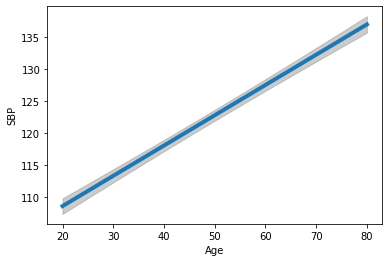

In [66]:
from statsmodels.sandbox.predict_functional import predict_functional

# Fix certain variables at reference values.  Not all of these
# variables are used here, but we provide them with a value anyway
# to prevent a warning message from appearing.
values = {"RIAGENDRx": "Female", "RIAGENDR": 1, "BMXBMI": 25,
          "DMDEDUC2": 1, "RIDRETH1": 1, "SMQ020": 1}

# The returned values are the predicted values (pr), the confidence bands (cb),
# and the function values (fv).
pr, cb, fv = predict_functional(result, "RIDAGEYR",
                values=values, ci_method="simultaneous")

ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Age")
_ = ax.set_ylabel("SBP")

Next, the analogous plot for BMI is shown. Here gender is fixed as "female" and the age at 50, to look at the relationship between expected SBP and age for women of age 50.

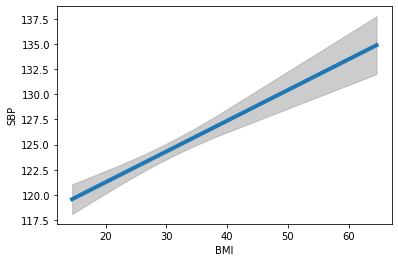

In [67]:
del values["BMXBMI"] # Delete this as it is now the focus variable
values["RIDAGEYR"] = 50
pr, cb, fv = predict_functional(result, "BMXBMI",
                values=values, ci_method="simultaneous")

ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("BMI")
_ = ax.set_ylabel("SBP")

The error band for BMI is wider than the error band for age, indicating there is less certainty about the relationship between BMI and SBP compared to the relationship between age and SBP.

The regression model will now be used to assess the variance structure of the population, i.e. how much and in what manner observations deviate from their mean. This will be done informally, using graphical methods for assessing this.

First, the residuals (differences between an observation and its fitted mean) will be plotted against the fitted values (estimated means for each observation).

With multiple covariates, it is hard to assess whether the variance is
uniform throughout this range, but can be checked for a mean/variance relationship, in which there is a systematic relationship between the variance and the mean, i.e. the variance either increases or decreases systematically with the mean.  The plot of residuals on fitted values is used to assess whether such a mean/variance relationship is present.

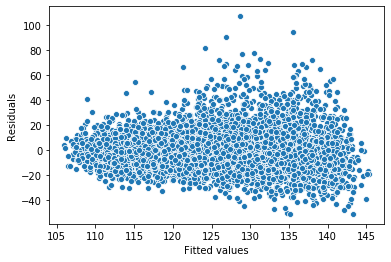

In [68]:
pp = sns.scatterplot(result.fittedvalues, result.resid)
pp.set_xlabel("Fitted values")
_ = pp.set_ylabel("Residuals")

It appears that there is a modestly increasing mean/variance relationship.  That is, the scatter around the mean BP is greater when the mean BP itself is greater.

Next, a partial residual plot will be used to show how the data would look if all but one covariate could be fixed at reference values to determine if the remaining variation is due either to the focus variable (the one variable that is left unfixed, and is plotted on
the horizontal axis), or unexplained variation sources by any of the covariates.

The partial residual plot below will show how age (horizontal axis) and SBP (vertical axis) would be related if gender and BMI were fixed.  

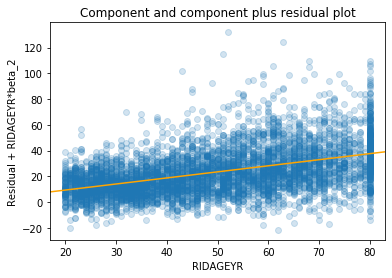

In [69]:
# This is not part of the main Statsmodels API, so needs to be imported separately
from statsmodels.graphics.regressionplots import plot_ccpr

ax = plt.axes()
plot_ccpr(result, "RIDAGEYR", ax)
ax.lines[0].set_alpha(0.2) # Reduce overplotting with transparency
_ = ax.lines[1].set_color('orange')

The above plot implies that when BMI and gender are held fixed, the average BPs of an 80 and 18 year old differ by around 30 mm/Hg.  This plot also shows that the deviations from the
mean are somewhat smaller at the low end of the range compared to the high end of the range.  Also, at the high end of the range, the deviations from the mean are somewhat right-skewed, with exceptionally high SBP values being more common than exceptionally low SBP values.

Next a partial residual plot will be plotted to see how BMI (horizontal axis) and SBP (vertical axis) would be related if gender and age were fixed. 

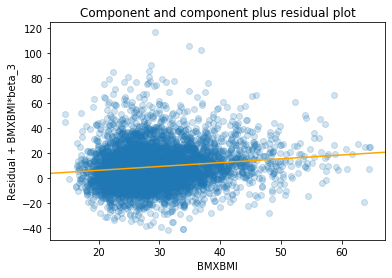

In [70]:
ax = plt.axes()
plot_ccpr(result, "BMXBMI", ax)
ax.lines[0].set_alpha(0.2)
ax.lines[1].set_color("orange")

Compared to the plot where age was on the horizontal axis, BMI is less uniformly distributed than age. Also, it appears that there is more scatter in the partial residuals for BMI compared to age. Thus there seems to be less information about SBP in BMI, although a trend exists.

Below, an added variable plot will be used to see if it reveals nonlinearity in the relationship between one covariate and the outcome - in this case, an added variable plot for age as a predictor of SBP. 

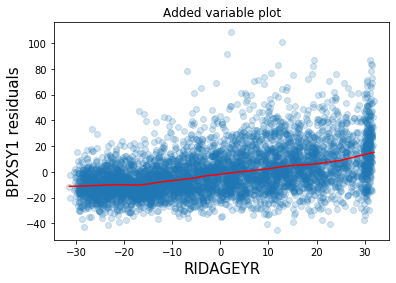

In [71]:
# This is not part of the main Statsmodels API, so needs to be imported separately
from statsmodels.graphics.regressionplots import add_lowess

# This is an equivalent way to fit a linear regression model, it needs to be
# done this way to be able to make the added variable plot
model = sm.GLM.from_formula("BPXSY1 ~ RIDAGEYR + BMXBMI + RIAGENDRx", data=da)
result = model.fit()
result.summary()

fig = result.plot_added_variable("RIDAGEYR")
ax = fig.get_axes()[0]
ax.lines[0].set_alpha(0.2)
_ = add_lowess(ax)

The two variables plotted above (age and BP) have been centred. The scale of the variables are unchanged, but the origin has been translated to zero. The red line is an estimte of the relationship between age and BP. There is a hint that the shape is slightly flatter for the first 15 years or so of age. This implies BP increases slightly more slowly for people in their 20s and early 30s, then begins increasing faster after that point.

# Multilevel and marginal modeling

In [72]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import statsmodels.api as sm
import numpy as np

As noted above, due to the study design, the data colleccted through NHANES can be considered as dependent, or have a mutilevel structure. Here the NHANES data will be reconsidered from the perspective of dependence, focusing in particular on dependence in the data that arises due to clustering in the study design.

The NHANES data can be consdered as dependent as the data values were collected in clusters; the population was partitioned into groups, a limited number of these groups were selected, and then a limited number of individuals were selected from each of the selected groups. Random selection of groups and individuals within groups was conducted with the goal in mind that by doing so, chances that the sample is representative of the population of interest in all relevant ways is maximised. However, regardless of how the clustering in the sample arose, it is likely to be the case that observations within a cluster are more similar to observations in different clusters. Thus, data has been collected by clustering, this should be accounted for in the analysis.

In NHANES the data are collected by selecting a limited number of counties in the US, then selecting subregions of these counties, then selecting people within these subregions.  Since counties are geographically constrained, it is expected that people within a county are more similar to each other than they are to people in other counties. Privacy reasons mean location names are hidden, therefore "masked variance units" (MVUs), are provided, which are formed by combining subregions of different counties into artificial groups that are not geographically contiguous. While the MVUs are not the actual clusters of the survey, and are not truly contiguous geographic regions, they are deliberately selected to mimic these things, while minimising the risk that a subject can be "unmasked" in the data. Therefore, MUVs will treated as clusters, and will be obtained by combining the `SDMVSTRA` and `SDMVPSU` identifiers.

In [73]:
# Read the data file
da = pd.read_csv("nhanes_2015_2016.csv")

# Drop unused columns, drop rows with any missing values.
vars = ["BPXSY1", "RIDAGEYR", "RIAGENDR", "RIDRETH1", "DMDEDUC2", "BMXBMI",
        "SMQ020", "SDMVSTRA", "SDMVPSU"]
#drop null values
da = da[vars].dropna()

In [74]:
da["group"] = 10*da.SDMVSTRA + da.SDMVPSU

## Intraclass correlation (ICC)

These will be estimated for NHANES clusters using a technique called Generalised Estimating Equations (GEE), and assessed using marginal regression and multilevel regression to find the level to which observations within clusters are correlated with each other (level of independence/dependence).

First, for SBP:

In [75]:
model = sm.GEE.from_formula("BPXSY1 ~ 1", groups="group",
           cov_struct=sm.cov_struct.Exchangeable(), data=da)
result = model.fit()
print(result.cov_struct.summary())

The correlation between two observations in the same cluster is 0.030


The estimated ICC is 0.03, which is small but not negligible.

To get a more systematic view of the ICC values induced by clustering in these data, the ICC for a number of different variables that appear in our analyses will be calculated.

In [76]:
# Recode smoking to a simple binary variable
da["smq"] = da.SMQ020.replace({2: 0, 7: np.nan, 9: np.nan})

for v in ["BPXSY1", "RIDAGEYR", "BMXBMI", "smq", "SDMVSTRA"]:
    model = sm.GEE.from_formula(v + " ~ 1", groups="group",
           cov_struct=sm.cov_struct.Exchangeable(), data=da)
    result = model.fit()
    print(v, result.cov_struct.summary())

BPXSY1 The correlation between two observations in the same cluster is 0.030
RIDAGEYR The correlation between two observations in the same cluster is 0.035
BMXBMI The correlation between two observations in the same cluster is 0.039
smq The correlation between two observations in the same cluster is 0.026
SDMVSTRA The correlation between two observations in the same cluster is 0.959


The values are generally similar to the value for BP, except for SDMVSTRA, which is one component of the cluster definition itself, and therefore has a very high ICC.

To see whether the ICC values above are consistent or not with a complete absence of dependence, 10 sets of random data will be simulated and ICC values calculated for each set:

In [77]:
for k in range(10):
    da["noise"] = np.random.normal(size=da.shape[0])
    model = sm.GEE.from_formula("noise ~ 1", groups="group",
           cov_struct=sm.cov_struct.Exchangeable(), data=da)
    result = model.fit()
    print(v, result.cov_struct.summary())

SDMVSTRA The correlation between two observations in the same cluster is 0.001
SDMVSTRA The correlation between two observations in the same cluster is 0.000
SDMVSTRA The correlation between two observations in the same cluster is 0.004
SDMVSTRA The correlation between two observations in the same cluster is -0.003
SDMVSTRA The correlation between two observations in the same cluster is -0.002
SDMVSTRA The correlation between two observations in the same cluster is -0.002
SDMVSTRA The correlation between two observations in the same cluster is 0.000
SDMVSTRA The correlation between two observations in the same cluster is -0.001
SDMVSTRA The correlation between two observations in the same cluster is -0.001
SDMVSTRA The correlation between two observations in the same cluster is 0.001


The estimated ICC for pure simulated noise is random but highly concentrated near zero, varying from around -0.002 to +0.003.

## Conditional intraclass correlation

To the extent that "cluster effects" are found, it may be largely explained by demographic differences among the clusters. E.g., from previously, older people have higher SBP than younger people. Also, some clusters may contain a slightly older or younger set of people than others. Thus, by controlling for age, it could be anticipated that the ICC will become smaller. This will be investigated next:

In [78]:
model = sm.GEE.from_formula("BPXSY1 ~ RIDAGEYR", groups="group",
           cov_struct=sm.cov_struct.Exchangeable(), data=da)
result = model.fit()
print(result.cov_struct.summary())

The correlation between two observations in the same cluster is 0.019


The ICC for SBP drops from 0.03 to 0.02 when age is taken into consideration. Does it drop even further when additional covariates are added that are known to be predictive of BP, such as gender, BMI, ethnicity (C() syntax used to treat ethnicity variable as categorical)?

In [79]:
# Create a labeled version of the gender variable
da["RIAGENDRx"] = da.RIAGENDR.replace({1: "Male", 2: "Female"})

model = sm.GEE.from_formula("BPXSY1 ~ RIDAGEYR + RIAGENDRx + BMXBMI + C(RIDRETH1)",
           groups="group",
           cov_struct=sm.cov_struct.Exchangeable(), data=da)
result = model.fit()
print(result.cov_struct.summary())

The correlation between two observations in the same cluster is 0.013


The ICC has further reduced, to 0.013, due to controlling for these additional factors including ethnicity.

## Marginal linear models with dependent data

Thus, by understanding the clustering structure, additional insight about the data has been gained that complements understanding of the mean structure.  

Although the mean structure (i.e. regression coefficients) can be estimated without considering the dependence structure of the data, the standard errors and other statistics relating to uncertainty will likely be wrong when dependence in the data is ignored.

This can be shown by comparing two models with the same mean structure fit to the NHANES data.  The first is a multiple regression model fit using "ordinary least squares" (default method for independent data). The second is fit using GEE, which accounts for the dependence in the data.

In [80]:
# Fit a linear model with OLS
model1 = sm.OLS.from_formula("BPXSY1 ~ RIDAGEYR + RIAGENDRx + BMXBMI + C(RIDRETH1)",
           data=da)
result1 = model1.fit()

# Fit a marginal linear model using GEE to handle dependent data
model2 = sm.GEE.from_formula("BPXSY1 ~ RIDAGEYR + RIAGENDRx + BMXBMI + C(RIDRETH1)",
           groups="group",
           cov_struct=sm.cov_struct.Exchangeable(), data=da)
result2 = model2.fit()

x = pd.DataFrame({"OLS_params": result1.params, "OLS_SE": result1.bse,
                  "GEE_params": result2.params, "GEE_SE": result2.bse})
x = x[["OLS_params", "OLS_SE", "GEE_params", "GEE_SE"]]
print(x)

                   OLS_params    OLS_SE  GEE_params    GEE_SE
Intercept           91.736583  1.339378   92.168530  1.384309
RIAGENDRx[T.Male]    3.671294  0.453763    3.650245  0.454498
C(RIDRETH1)[T.2]     0.855488  0.819486    0.159296  0.767025
C(RIDRETH1)[T.3]    -1.796132  0.671954   -2.233280  0.760228
C(RIDRETH1)[T.4]     3.813314  0.732355    3.105654  0.881580
C(RIDRETH1)[T.5]    -0.455347  0.808948   -0.439831  0.813675
RIDAGEYR             0.478699  0.012901    0.474101  0.018493
BMXBMI               0.278015  0.033285    0.280205  0.038553


The above whos that the point estimates are similar between the OLS and GEE fits of the model, but the standard errors tend to be larger in the GEE fit. For example, the standard errors for BMI and age are 20-40% larger in the GEE fit. 

Since there is dependence in these data due to clustering, the OLS approach is not justified as the standard errors are not meaningful. GEE parameter estimates and standard errors are meaningful in the presence of dependence, as long as the dependence is exclusively between observations within the same cluster.

## Multilevel models

Here, multilevel modeling will be used as an alternative way to accommodate dependence in clustered data.

A multilevel model is usually expressed in terms of random effects - variables that are not observed, but can nevertheless be incorporated into a statistical model. While these random effects are not observed, their presence can be inferred through the data, as long as each random effect is modeled as influencing at least two observations.

The focus here is only on dependence that arises through a single level of clustering.

In [81]:
# Fit a multilevel (mixed effects) model to handle dependent data
model = sm.MixedLM.from_formula("BPXSY1 ~ RIDAGEYR + RIAGENDRx + BMXBMI + C(RIDRETH1)",
           groups="group", data=da)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary2.Summary'>
"""
           Mixed Linear Model Regression Results
============================================================
Model:             MixedLM  Dependent Variable:  BPXSY1     
No. Observations:  5102     Method:              REML       
No. Groups:        30       Scale:               256.6952   
Min. group size:   106      Likelihood:          -21409.8702
Max. group size:   226      Converged:           Yes        
Mean group size:   170.1                                    
------------------------------------------------------------
                  Coef.  Std.Err.   z    P>|z| [0.025 0.975]
------------------------------------------------------------
Intercept         92.173    1.402 65.752 0.000 89.426 94.921
RIAGENDRx[T.Male]  3.650    0.452  8.084 0.000  2.765  4.535
C(RIDRETH1)[T.2]   0.153    0.887  0.172 0.863 -1.586  1.891
C(RIDRETH1)[T.3]  -2.238    0.758 -2.954 0.003 -3.723 -0.753
C(RIDRETH1)[T.4]   3.098    0.836  3.707 0.000  1.460  4.737
C(RIDRETH1)[T.5]  -0.439    0.878 -0.500 0.617 -2.161  1.282
RIDAGEYR           0.474    0.013 36.482 0.000  0.449  0.500
BMXBMI             0.280    0.033  8.404 0.000  0.215  0.346
group Var          3.615    0.085                           
============================================================

"""

The variance structure parameter is the variance for groups, estimated to be 3.615.  This means that if two groups were chosen at random, their random effects would differ on average by around 2.69 (square root of 2 * 3.615).  This is a sizable shift, comparable to the difference between females and males, or to around 6 years of aging.

At least in this setting, the mixed modelling procedure accommodates dependence in the data, provides rigorous estimates of the strength of this dependence, and accounts for the dependence in both estimation and inference for the regression parameters. In this sense, the multilevel model has the same desirable properties as GEE (at least in this setting). 

Multilevel models can also be used to estimate ICC values.  In the case of a model with one level, as here, the ICC is the variance of the grouping variable (3.615) divided by the sum of
the variance of the grouping variable and the unexplained variance (256.7 - uunder scale). This ratio is around 0.014, which is very similar to the estimated ICC obtained using GEE.

### Predicted random effects

The actual random effects in the multilevel model, whilst not observable, can be predicted from the data.  

What are the predicted random effects for the 30 groups in this analysis?

In [82]:
result.random_effects

{1191: group   -1.630976
 dtype: float64, 1192: group   -0.086162
 dtype: float64, 1201: group   -2.042661
 dtype: float64, 1202: group   -0.147472
 dtype: float64, 1211: group    0.280623
 dtype: float64, 1212: group    1.580732
 dtype: float64, 1221: group    0.283347
 dtype: float64, 1222: group    0.131512
 dtype: float64, 1231: group   -2.038171
 dtype: float64, 1232: group    0.617651
 dtype: float64, 1241: group    2.878488
 dtype: float64, 1242: group   -0.519364
 dtype: float64, 1251: group    2.064967
 dtype: float64, 1252: group    1.521281
 dtype: float64, 1261: group   -1.261975
 dtype: float64, 1262: group    0.980846
 dtype: float64, 1271: group    0.118031
 dtype: float64, 1272: group   -0.128397
 dtype: float64, 1281: group   -0.384862
 dtype: float64, 1282: group   -3.582111
 dtype: float64, 1291: group   -3.271017
 dtype: float64, 1292: group   -0.829538
 dtype: float64, 1301: group   -0.884171
 dtype: float64, 1302: group    2.790657
 dtype: float64, 1311: group   -

Based on these predicted random effects, for example, cluster 1241 has unusually high SBP, and
cluster 1282 has unusually low SBP. These deviations from what is expected are observed after adjusting for the covariates in the model, and hence are presumably driven by other characteristics of these clusters not reflected in the covariates.

### Random slopes

Next a more subtle form of cluster effect will be considered, in which the slope for a specific covariate varies from cluster to cluster - random slopes model.  

Below a model will be fitted in which SBP has cluster-specific intercepts, and cluster-specific slopes for the age covariate; asking whether the rate at which BP increases with age might differ from one cluster to the next.

Two variations on this model will be implemented. In the first, the cluster-specific intercepts and slopes are independent random variables (a cluster with unusually high SBP is no more or less likely to have unusually rapid increase of SBP with age). 

Any covariate that has a random slope will be centred (here, centre within each cluster), which will not change the fundamental interpretation of the model, but will help the model converge faster and more robustly.

In [83]:
da["age_cen"] = da.groupby("group").RIDAGEYR.transform(lambda x: x - x.mean())

model = sm.MixedLM.from_formula("BPXSY1 ~ age_cen + RIAGENDRx + BMXBMI + C(RIDRETH1)",
           groups="group", vc_formula={"age_cen": "0+age_cen"}, data=da)
result = model.fit()
result.summary()

/Users/charlottefettes/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
             Mixed Linear Model Regression Results
===============================================================
Model:              MixedLM   Dependent Variable:   BPXSY1     
No. Observations:   5102      Method:               REML       
No. Groups:         30        Scale:                263.7323   
Min. group size:    106       Likelihood:           -21469.9240
Max. group size:    226       Converged:            Yes        
Mean group size:    170.1                                      
---------------------------------------------------------------
                   Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
---------------------------------------------------------------
Intercept         115.207    1.209 95.265 0.000 112.836 117.577
RIAGENDRx[T.Male]   3.643    0.457  7.962 0.000   2.746   4.539
C(RIDRETH1)[T.2]    1.167    0.827  1.412 0.158  -0.453   2.787
C(RIDRETH1)[T.3]   -1.659    0.679 -2.444 0.015  -2.989  -0.328
C(RIDRETH1)[T.4]    3.610    0.739  4.884 0.000   2.161   5.058
C(RIDRETH1)[T.5]   -1.208    0.816 -1.480 0.139  -2.807   0.392
age_cen             0.467    0.018 26.235 0.000   0.432   0.502
BMXBMI              0.288    0.034  8.574 0.000   0.222   0.353
age_cen Var         0.004    0.000                             
===============================================================

"""

This shows that the estimated variance for random age slopes is 0.004, which translates to a standard deviation of 0.06. That is, from one cluster to another, the age slopes fluctuate by $\pm 0.06-0.12$ (1-2 standard deviations). These cluster-specific fluctuations are added/subtracted from the fixed effect for age, which is 0.467. Thus,
in some clusters SBP may increase by around 0.467 + 0.06 = 0.527mm/Hg per year, while in other clusters SBP may increase by only around 0.467 - 0.06 = 0.407mm/Hg per year. 

The fitting algorithm produces a warning that the estimated variance parameter is close to the boundary. In this case, however, the algorithm seems to have converged to a point just short of the boundary.

In the second model, the cluster-specific intercepts and slopes will be allowed to be correlated.

In [84]:
model = sm.MixedLM.from_formula("BPXSY1 ~ age_cen + RIAGENDRx + BMXBMI + C(RIDRETH1)",
           groups="group", re_formula="1+age_cen", data=da)
result = model.fit()
result.summary()

/Users/charlottefettes/anaconda3/lib/python3.7/site-packages/statsmodels/regression/mixed_linear_model.py:2094: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)


<class 'statsmodels.iolib.summary2.Summary'>
"""
              Mixed Linear Model Regression Results
=================================================================
Model:                MixedLM   Dependent Variable:   BPXSY1     
No. Observations:     5102      Method:               REML       
No. Groups:           30        Scale:                255.4451   
Min. group size:      106       Likelihood:           -21413.6193
Max. group size:      226       Converged:            Yes        
Mean group size:      170.1                                      
-----------------------------------------------------------------
                     Coef.  Std.Err.   z    P>|z|  [0.025  0.975]
-----------------------------------------------------------------
Intercept           115.467    1.340 86.173 0.000 112.840 118.093
RIAGENDRx[T.Male]     3.662    0.451  8.121 0.000   2.778   4.546
C(RIDRETH1)[T.2]      0.023    0.898  0.025 0.980  -1.738   1.783
C(RIDRETH1)[T.3]     -2.251    0.778 -2.893 0.004  -3.775  -0.726
C(RIDRETH1)[T.4]      3.011    0.854  3.524 0.000   1.336   4.686
C(RIDRETH1)[T.5]     -0.585    0.893 -0.655 0.512  -2.336   1.165
age_cen               0.466    0.018 26.286 0.000   0.431   0.501
BMXBMI                0.283    0.033  8.497 0.000   0.218   0.349
group Var             8.655    0.169                             
group x age_cen Cov   0.119    0.004                             
age_cen Var           0.004    0.000                             
=================================================================

"""

Again, there is a warning that the algorithm is close to the boundary. 

The estimated correlation coefficient between random slopes and random intercepts is estimated to be 0.119/sqrt(8.655 * 0.004), which is around 0.64.  This indicates that clusters with unusually high average SBP also tend to have SBP increasing faster with age. But these structural parameters are only estimates, and due to the variance parameter falling close to the boundary, the estimates may not be precise.